In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook

In [52]:
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing

In [54]:
simple_objective = lambda x: 2*x[0]**2 + 20*np.sin(x[1]) + 10 * x[1]
simple_anneal = SimulatedAnnealing(x_length=2, x_bounds=(-10, 10), objective_function=simple_objective, 
                                   archive_minimum_acceptable_dissimilarity=3, maximum_markov_chain_length=100,
                                           temperature_maximum_iterations=100, pertubation_fraction_of_range=0.1)
x_result, objective_result = simple_anneal.run()
archive_x = np.array([x_archive for x_archive, f_archive in simple_anneal.archive])
archive_f = np.array([f_archive for x_archive, f_archive in simple_anneal.archive])
print(f"x_result = {x_result} \n objective_result = {objective_result}")

x_result = [ 0.40312922 -8.46488675] 
 objective_result = -100.70642457174064


<IPython.core.display.Javascript object>


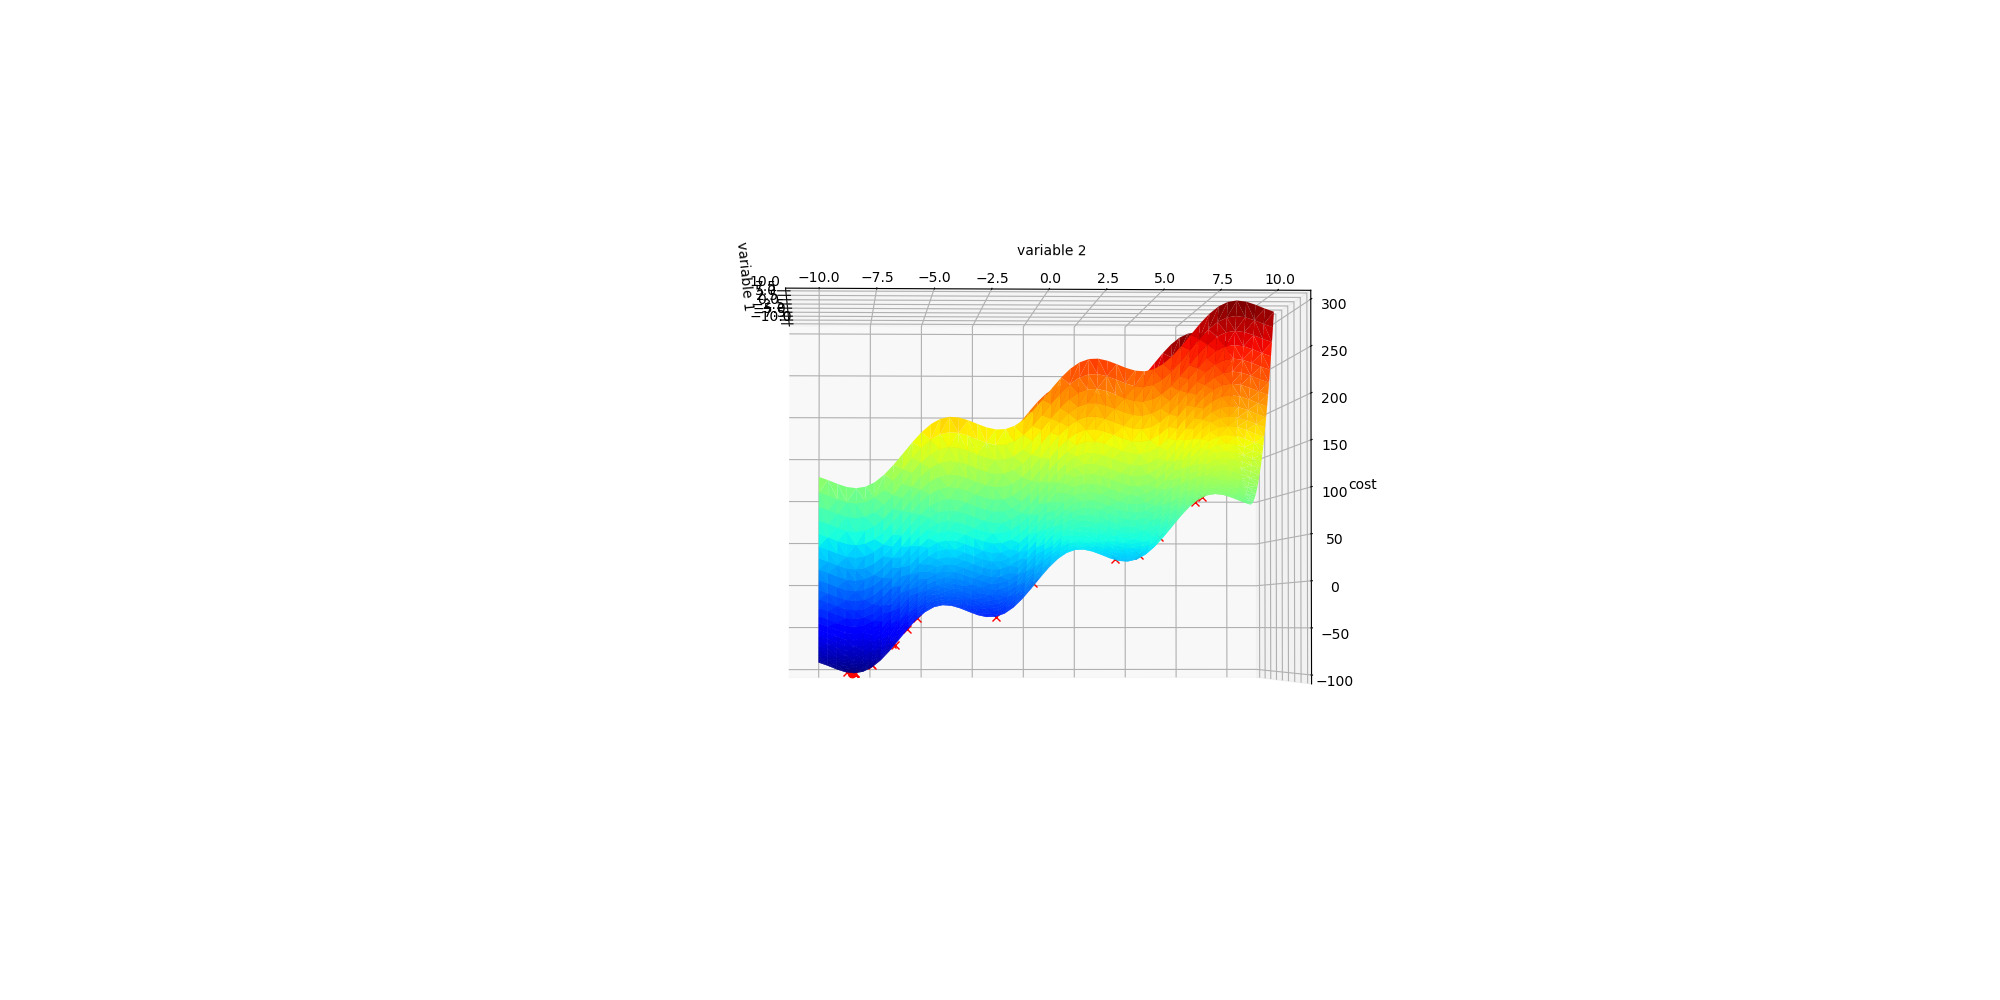

In [55]:
n = 50
x1_linspace = np.linspace(-10, 10, n)
x2_linspace = np.linspace(-10, 10, n)
z = np.zeros((n, n))
for i, x1_val in enumerate(x1_linspace):
    for j, x2_val in enumerate(x2_linspace):
        z[i, j] = simple_objective(np.array([x1_val, x2_val]))
x2, x1 = np.meshgrid(x1_linspace, x2_linspace)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x1.flatten(), x2.flatten(), z.flatten(), cmap=mpl.cm.jet)
ax.plot(x_result[0], x_result[1], objective_result, "or")
ax.plot(archive_x[:, 0], archive_x[:, 1], archive_f, "xr")
ax.set_xlabel("variable 1")
ax.set_ylabel("variable 2")
ax.set_zlabel("cost")
fig.show()